<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Optimization</h1></center>
<center><h2>Lab3 (LD): Optimization 101 (3h) : UZAWA method</h2></center>

# Projected gradient

In this Lab, we continue to divide our optimization program into three parts:
* the *run* environment, in which we test, run our program, and display results (this file!)
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used. In this lab, we will re-use and adapt the problem part from previous lab. The algorithmic part is fundamentally new (well, adapted from the gradient methods from previous lab). We can now deal with some simple constraints such as positivity constraints of more generally interval constraints on the variables. 

In the present lab, we use this division:
* `3_Optimization101.ipynb` (*this file*) is the *run* environment 
* `problem31.ipynb`, `problem32.ipynb`,... are the considered *problems* for this lab (see <a href="#pbs">Problems</a>)
* `algoUzawa.ipynb` will contain the needed *algorithms* studied in this lab (Uzawa methods, Newton method for the Lagrangian, ...)

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

---

# 1. Uzawa algorithm on a simple function with a single affine constraints

We begin by investigating <a href="#pb31">Problem 31</a>

> Observe the 3D and level plots of the function.

In [2]:
import problem31 as pb31
reload(pb31)        # reload the module if changed (and saved)
from problem31 import *  # import all methods of the module into the current environment

importing notebook from problem31.ipynb
importing notebook from problem31.ipynb


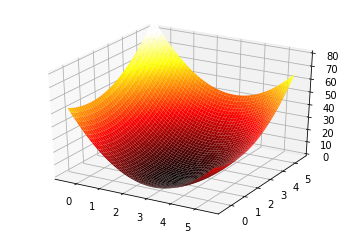

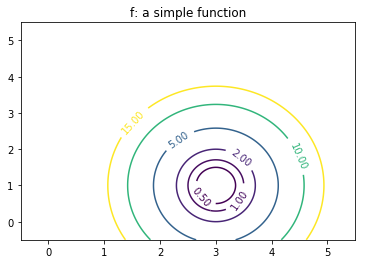

In [3]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb31.f, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.vmin, pb31.vmax )
level_plot( pb31.f, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.levels , pb31.title )

In [4]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb31.phi1, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.phi1vmin, pb31.phi1vmax )
level_plot( pb31.phi1, pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.phi1levels , pb31.phi1title )

ValueError: shapes (1,2) and (2,200,200) not aligned: 2 (dim 1) != 200 (dim 1)

### 1.a. Uzawa method for problem31

> Examine the functions and variables defined in `problem31.ipynb`. Complete when asked <br/>
> Complete the function `uzawa_affine_algorithmp` and `newton_lagrangian_algo` as asked in `algoUzawa.ipynb [Sec. 1a]` <br/>
> Examine and run the cells below. Notably change the step size `rho` and observe the different behaviors of the algorithm. Modify also the different initial values of lambda0 and x0

In [9]:
import algoUzawa         # load our algoUzawa  module (from notebook)
reload(algoUzawa)        # reload the module if changed (and saved)
from algoUzawa import *  # import all methods of the module into the current environment

import problem31 as pb31
reload(pb31) 
from problem31 import *  # import all methods of the module into the current environment

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 15                      # Max number of iterations
x0      = np.array( (2.0,2.0 ) )   # Initial point: does it satisfies the constraint ?
#step    = 1.5/pb21.L                # Stepsize 
rho = pb31.rhomax/2.    #step size in the projected gradient for the dual
lambda0 = np.array( [1.0])  

##### Uzawa affine algorithm


lambdak,xk,x_tab = uzawa_affine_algorithm(pb31.f , pb31.lagrangian, pb31.lagrangian_grad_hessian,pb31.C,  pb31.phi, x0 , lambda0, rho , PREC , ITE_MAX )


importing notebook from algoUzawa.ipynb
importing notebook from problem31.ipynb
--------------------------
 Constant Stepsize projected gradient
-------------------
START    -- stepsize = 2.0


TypeError: lagrangian_grad_hessian() missing 1 required positional argument: 'C'

##### Plotting

The following cell plots the iterates over the level sets of the minimized function.

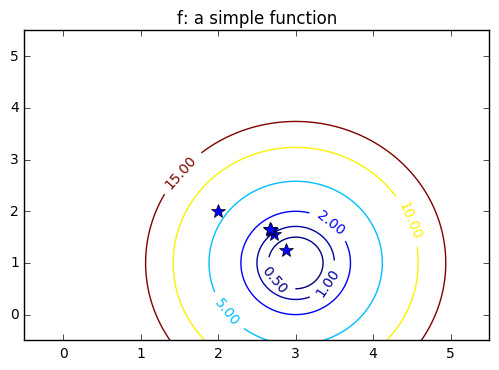

In [6]:
from plotLib import *
%matplotlib inline

level_points_plot( pb31.f , x_tab , pb31.x1_min,pb31.x1_max,pb31.x2_min,pb31.x2_max,pb31.nb_points, pb31.levels , pb31.title )

---
# 2. More constraints 

Now, save the file  problem31.ipynb into problem32.ipynb and modify this file in order to add the new constraint phi2(x) = 2 * x1 - 1 * x2 - 3 ;  (this is the same function f <a href="#pb31">Problem 32</a> to minimize but with different constrainst). Is it necessary to adapt the Uzawa algorithm ? Examine the behavior of Uzawa algorithm in this case



importing notebook from problem32.ipynb
importing notebook from problem32.ipynb


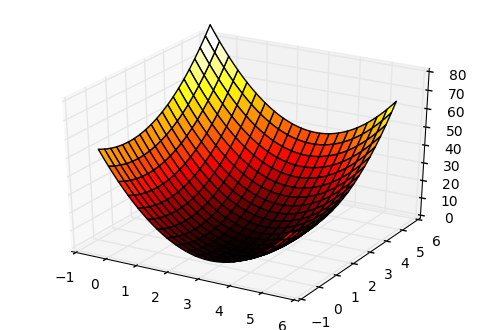

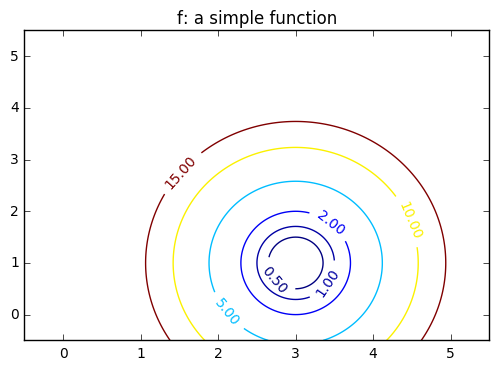

In [11]:
import problem32 as pb32
reload(pb32) 
from problem32 import *  # import all methods of the module into the current environment


from plotLib import *
%matplotlib inline

custom_3dplot( pb32.f, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.vmin, pb32.vmax )
level_plot( pb32.f, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.levels , pb32.title )

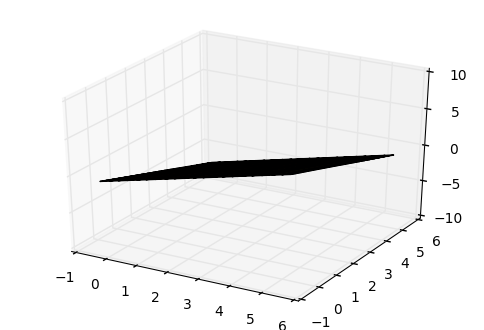

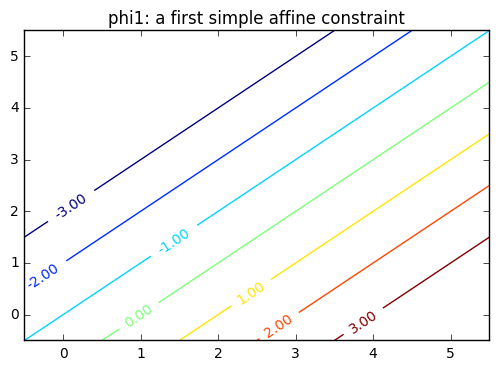

In [12]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb32.phi1, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1vmin, pb32.phi1vmax )
level_plot( pb32.phi1, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1levels , pb32.phi1title )

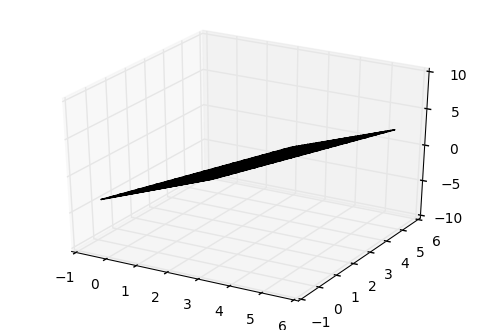

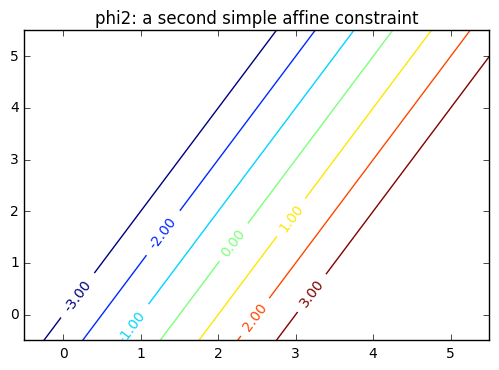

In [13]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb32.phi2, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1vmin, pb32.phi1vmax )
level_plot( pb32.phi2, pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.phi1levels , pb32.phi2title )


> Run the Uzawa method on the problem32

In [14]:
import algoUzawa         # load our algoUzawa  module (from notebook)
reload(algoUzawa)        # reload the module if changed (and saved)
from algoUzawa import *  # import all methods of the module into the current environment

import problem32 as pb32
reload(pb32) 
from problem32 import *  # import all methods of the module into the current environment

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 15                       # Max number of iterations
x0      = np.array( (2.0,2.0 ) )   # Initial point: does it satisfies the constraint ?
#step    = 1.5/pb21.L                # Stepsize 
rho = pb32.rhomax/2.    #step size in the projected gradient for the dual
lambda0 = np.array( [2.0 , 1.0 ])  

##### Uzawa affine algorithm

val = pb32.lagrangian(x0,lambda0)
print("val = ({:.2f}) \n".format(val))
val = pb32.lagrangian(x0,lambda0)
g,H = pb32.lagrangian_grad_hessian(x0,lambda0)
print("gradient = ({:.2f},{:.2f}) \n".format(g[0],g[1]))

lambdak,xk,x_tab = uzawa_affine_algorithm(pb32.f , pb32.lagrangian, pb32.lagrangian_grad_hessian,  pb32.phi, x0 , lambda0, rho , PREC , ITE_MAX )


importing notebook from algoUzawa.ipynb
importing notebook from problem32.ipynb
val = (3.00) 

gradient = (-4.00,1.00) 

--------------------------
 Constant Stepsize projected gradient
-------------------
START    -- stepsize = 2.0
------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000097s -- langrangian final value: 1.875000 at point x (2.50,1.75) 


xk = (2.50,1.75) ; gradLangragian = (0.50,0.00) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000057s -- langrangian final value: 2.109375 at point x (2.44,1.75) 


xk = (2.44,1.75) ; gradLangragian = (-0.12,0.38) 

------------------------------------
Newton's algorithm
------------------------------------
START
Newton FINISHED -- 1 iterations / 0.000053s -- langrangian final value: 2.317383 at point x (2.45,1.66) 


xk = (2.45,1.66) ; gradLangragian = (0.59,-0.09)

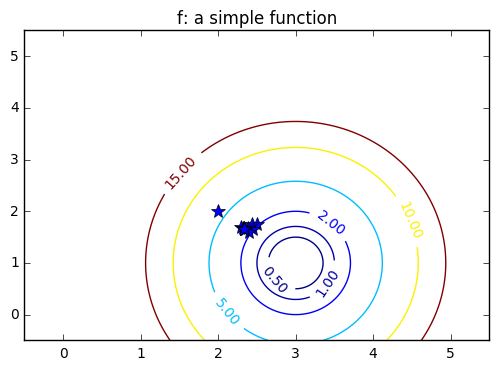

In [15]:
from plotLib import *
%matplotlib inline

level_points_plot( pb32.f , x_tab , pb32.x1_min,pb32.x1_max,pb32.x2_min,pb32.x2_max,pb32.nb_points, pb32.levels , pb32.title )

# Appendix: <a id="pbs">Problems</a>

The problems we consider in this lab around uzawa is minimizations of convex functions under affine constraints using the Uzawa algorithms. The function `f` considered is identical to the first function froms the first lab.

However, more involved functions could also be tested just as less simple qualified convex constraints compare to affine constraints.... 


> **1.** <a id="pb31">`problem1`</a> features a simple quadratic function
$$\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2 + 0.5)^2
\end{array}$$
<center><img src="Fig/1.png" width="50%"></center>


> **2.** <a id="pb2">`problem2`</a> features a more involved but very smooth function
$$\begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3)
\end{array}$$
<center><img src="Fig/2.png" width="50%"></center>


> **3.** <a id="pb3">`problem3`</a> features Rosenbrock's smooth but non-convex function
$$\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{array}$$
<center><img src="Fig/3.png" width="50%"></center>


> **4.** <a id="pb4">`problem4`</a> features a smooth function with two distinct minimizers
$$\begin{array}{rrcll}
t: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & (0.6 x_1 + 0.2 x_2)^2 \left((0.6 x_1 + 0.2 x_2)^2 - 4 (0.6 x_1 + 0.2 x_2)+4\right) + (-0.2 x_1 + 0.6 x_2)^2
\end{array}$$
<center><img src="Fig/4.png" width="50%"></center>


> **5.** <a id="pb5">`problem5`</a> features a polyhedral function
$$\begin{array}{rrcll}
p: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  \left| x_1-3 \right|  + 2\left| x_2-1\right| .
\end{array}$$
<center><img src="Fig/5.png" width="50%"></center>

